In [1]:

import torch 
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#load csv file
directory = "data\linear"
file = "breast.csv"
path = os.path.join(directory,file)
print(path)


data_frame = pd.read_csv(path)
data_frame = data_frame.drop(['id','Unnamed: 32'],axis=1)
x = data_frame[['radius_mean']]
y = data_frame[['diagnosis']]

data\linear\breast.csv


In [3]:
x

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


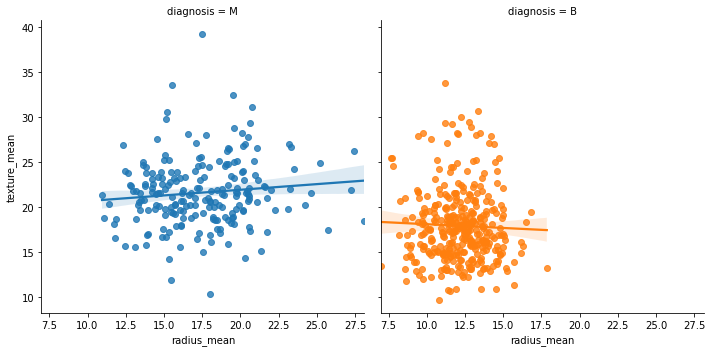

In [4]:
ax = sns.lmplot(x="radius_mean", y="texture_mean", col='diagnosis',hue='diagnosis',data=data_frame)

In [5]:
arr = data_frame.iloc[0].to_numpy()
arr

array(['M', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
       0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
       0.05372999999999999, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
       184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
      dtype=object)

In [6]:
#Implement own dataset

class LogisticDataset(Dataset):

    def __init__(self,directory_path,file_name):
        super(LogisticDataset,self).__init__()
        # assign path before read csv
        self.directory_path = directory_path
        self.file_name = file_name
        #join path

        data_directory = os.path.join(directory_path,file_name)

        #read csv
        data_frame = pd.read_csv(data_directory)
        self.x = data_frame[['radius_mean']].values
        self.y = data_frame[['diagnosis']].values

    def __len__(self):
        return data_frame.shape[0]
    
    def __getitem__(self,idx):
        return self.x[idx] , self.y[idx]
        

In [7]:
dataset = LogisticDataset(directory_path = directory,file_name = file)

(array([17.99]), array(['M'], dtype=object))